In [1]:
%pylab inline
from astropy.io import fits
from astropy.table import Table
from simqso.sqrun import buildWaveGrid,load_spectra
from simqso import hiforest
from simqso.sqmodels import WP11_model
import bossqsos

Populating the interactive namespace from numpy and matplotlib


### Input luminosity function

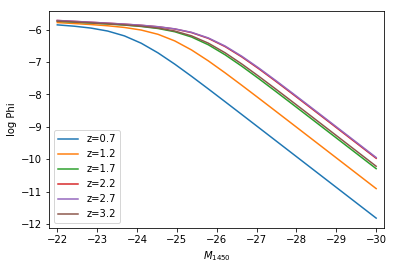

In [2]:
M1450 = linspace(-30,-22,20)
zz = arange(0.7,3.5,0.5)
ple = bossqsos.BOSS_DR9_PLE()
lede = bossqsos.BOSS_DR9_LEDE()
for z in zz:
    if z<2.2:
        qlf = ple if z<2.2 else lede
    plot(M1450,qlf(M1450,z),label='z=%.1f'%z)
legend(loc='lower left')
xlim(-21.8,-30.2)
xlabel("$M_{1450}$")
ylabel("log Phi")

### Run the simulation, save the spectra

In [3]:
_ = bossqsos.qsoSimulation(bossqsos.simParams,saveSpectra=True)

boss_dr9qlf_sim output not found
generating QSO grid
integration returned  417  objects
... building continuum grid
using Fe scales:  [(0, 1540, 0.5), (1540, 1680, 2.0), (1680, 1868, 1.6), (1868, 2140, 1.0), (2140, 3500, 1.0)]
simulating  417  quasar spectra
units are  flux
max number iterations:  5
mapping photometry
               stage     time  elapsed     frac
     Initialize Grid    2.665    2.665    0.039
   Generate Features    1.846    4.511    0.027
Build Quasar Spectra   64.535   69.046    0.934
            PhotoMap    0.039   69.085    0.001
              Finish    0.000   69.085    0.000



### Simulation outputs

In [4]:
wave,qsos = load_spectra('boss_dr9qlf_sim','.')

the table of simulated quasars, including redshift, luminosity, synthetic flux/mags in nine bands, and "observed" photometry with errors included.

also includes details of the model inputs for each quasar: `slopes` is the set of broken power law slopes defining the continuum, `emLines` is the set of Gaussian parameters for each emission line (wave, EW, sigma) measured in the rest frame.

In [5]:
qsos[::40]

appMag,z,absMag,slopes [5],"emLines [62,3]",igmlos,synMag [9],synFlux [9],obsFlux [9],obsMagErr [9],obsMag [9],obsFluxErr [9],spec [2304]
float64,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32
20.3128782397,3.38902504045,-25.2643085549,-1.12142997071 .. -0.3178454949,1033.6161186 .. 297.708636021,95,22.5119 .. 19.2285,0.989118 .. 20.3515,0.918908 .. 21.4667,0.149141 .. 0.0928293,22.1892 .. 19.1706,0.239306 .. 1.83544,4.30638e-18 .. 1.57276e-19
20.345525336,2.95438820017,-24.8195154758,-1.37668373191 .. -0.737933531624,1033.00714776 .. 295.290209478,132,21.83 .. 20.0832,1.85358 .. 9.26246,1.68304 .. 11.1569,0.0882214 .. 0.132177,21.7675 .. 19.8811,0.182115 .. 1.35828,1.00263e-17 .. 1.09121e-19
18.4957278322,3.48418610675,-27.155483701,-1.72259690032 .. -1.0806204369,1033.71490936 .. 286.223278939,160,21.5035 .. 17.598,2.50388 .. 91.3684,2.49718 .. 94.1444,0.0856838 .. 0.0199806,21.4209 .. 17.5655,0.229091 .. 1.73258,0.0 .. 2.14313e-18
21.6201076923,3.37169074197,-23.9140428046,-1.45717185716 .. -1.13501161837,1033.69901136 .. 249.222453444,63,24.9511 .. 20.3038,0.104609 .. 7.5595,0.00319853 .. 10.8605,0.126915 .. 0.190017,22.8238 .. 19.9104,0.173008 .. 1.90079,0.0 .. 1.06974e-19
21.7254080947,2.37873263877,-23.100676079,-1.79699724459 .. -0.972062525508,1034.08763243 .. 241.496333342,14,22.1869 .. 21.3585,1.33423 .. 2.86159,2.07215 .. 0.688693,0.103893 .. 2.02676,21.5906 .. 22.9049,0.243673 .. 1.28563,1.10302e-17 .. 4.1543e-20
21.684311445,3.04074741836,-23.5040731147,-1.62429725064 .. -1.01464419592,1032.95579395 .. 247.737389244,50,23.2386 .. 22.0093,0.5065 .. 1.5714,0.735012 .. -0.179116,0.127063 .. 0.0,22.307 .. 99.99,0.193394 .. 1.61536,0.0 .. 1.80153e-20
20.081088415,2.85402005556,-24.99972504,-1.00808528804 .. -1.02109464148,1033.92024503 .. 310.187857446,54,21.635 .. 19.5004,2.2182 .. 15.8425,1.94662 .. 15.5027,0.120933 .. 0.113026,21.6452 .. 19.524,0.272381 .. 1.6139,0.0 .. 3.47772e-19
21.8079141132,2.8990074215,-23.317751211,-2.32912485287 .. -1.26333147581,1033.73141677 .. 288.965200439,39,23.1604 .. 21.7898,0.544301 .. 1.92341,0.971031 .. 0.907009,0.165585 .. 2.0777,22.157 .. 22.606,0.269968 .. 1.73574,1.295e-18 .. 3.60855e-20
19.9593097995,2.05317286164,-24.5490849819,-1.33356152668 .. -0.821585909309,1033.88623953 .. 342.265893378,41,19.941 .. 19.4434,10.5584 .. 16.6968,10.8162 .. 18.3136,0.0556317 .. 0.111312,19.9091 .. 19.3431,0.559392 .. 1.8776,6.5292e-17 .. 2.72726e-19


the distribution in g-band magnitude:

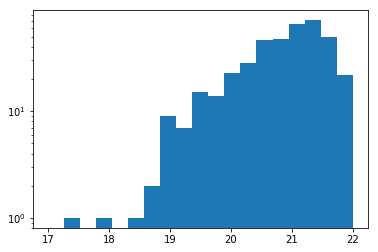

In [6]:
_ = hist(qsos['obsMag'][:,1],linspace(17,22,20),log=True)

color-color diagram from __observed__ magnitudes, including errors:

(-0.5, 1.5)

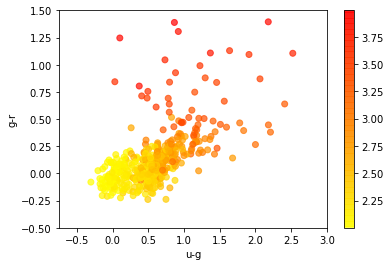

In [7]:
scatter(qsos['obsMag'][:,0]-qsos['obsMag'][:,1],qsos['obsMag'][:,1]-qsos['obsMag'][:,2],
        c=qsos['z'],cmap=cm.autumn_r,alpha=0.7)
colorbar()
xlabel('u-g')
ylabel('g-r')
xlim(-0.75,3)
ylim(-0.5,1.5)

the list of emission lines in the model:

In [8]:
qsodatahdr = fits.getheader('boss_dr9qlf_sim.fits',1)
for i,n in enumerate(qsodatahdr['LINENAME'].split(',')):
    print '%d:%s, '% (i,n,),
print

0:LyB,  1:ArI,  2:FeIII:UV1,  3:CIII*,  4:LyAn,  5:LyAb,  6:NV,  7:SiII,  8:OI,  9:CII,  10:SiIV+OIV],  11:L1480,  12:CIVn,  13:CIVb,  14:HeII,  15:OIII],  16:L1690,  17:NIII],  18:SiII_1818,  19:AlIII,  20:SiIII],  21:CIII]b,  22:CIII]n,  23:fe2120,  24:fe2220,  25:MgIIb,  26:MgIIn,  27:OIII_3133,  28:[NeV]3346,  29:[NeV]3426,  30:[OII]3728,  31:[NeIII]3869,  32:HeI3889,  33:[NeIII]3968,  34:Hd,  35:Hg,  36:[OIII]4364,  37:Hbeta,  38:[OIII]4960,  39:[OIII]5008,  40:HeI_5877,  41:[OI]6302,  42:[OI]6365,  43:[NII]6549,  44:[NII]6585,  45:HAb,  46:HAn,  47:[SII]6718,  48:[SII]6732,  49:HeI7067,  50:[OII]7321,  51:OI8446,  52:[SIII]9069,  53:FeII9202,  54:Pae,  55:Pad,  56:HeI10830,  57:Pag,  58:OI11287,  59:Pabeta,  60:Paalpha,  61:HeI20580, 


broad CIV equivalent width, displaying the Baldwin Effect:

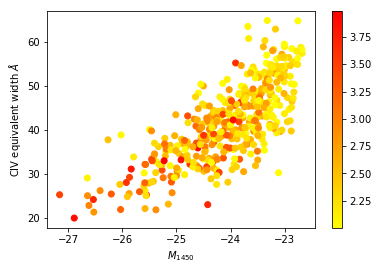

In [9]:
scatter(qsos['absMag'],qsos['emLines'][:,13,1],c=qsos['z'],cmap=cm.autumn_r)
colorbar()
xlabel("$M_{1450}$")
ylabel("CIV equivalent width $\AA$")

### Example spectra

for this example the wavelength cutoff is 30 micron, but the model doesn't include warm dust and thus is invalid beyond a few micron.

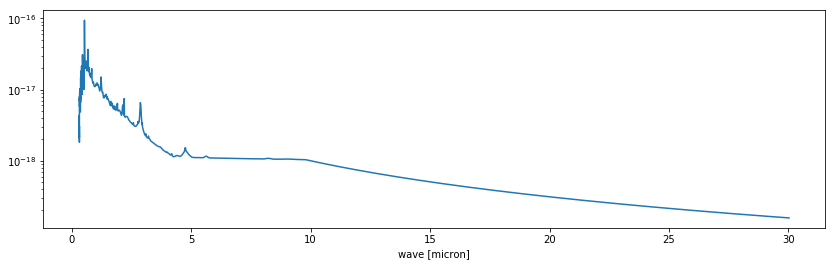

In [10]:
figure(figsize=(14,4))
plot(wave/1e4,qsos['spec'][0])
yscale('log')
xlabel('wave [micron]')

zoom in on the lyman alpha - CIV region:

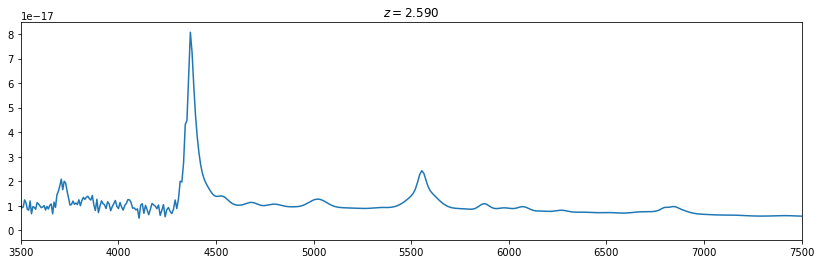

In [11]:
figure(figsize=(14,4))
plot(wave,qsos['spec'][20])
xlim(3500,7500)
title('$z=%.3f$'%qsos['z'][20])

### IGM absorption model (`simqso.hiforest`)

an example of the forest transmission spectra at R=30,000 (the native resolution for the monte carlo forest spectra):

In [12]:
np.random.seed(12345)
wave = buildWaveGrid(dict(waveRange=(3500,4800),SpecDispersion=30000))
forest = hiforest.IGMTransmissionGrid(wave,WP11_model,1)
T = forest.next_spec(0,2.9)

ValueError: operands could not be broadcast together with shapes (59,) (69,) (59,) 

In [ ]:
figure(figsize=(14,4))
plot(wave,T)

In [ ]:
figure(figsize=(14,4))
plot(wave,T)
xlim(4300,4800)